# What's Pandas for?

Pandas has so many uses that it might make sense to list the things it can't do instead of what it can do.

This tool is essentially your data’s home. Through pandas, you get acquainted with your data by cleaning, transforming, and analyzing it.

For example, say you want to explore a dataset stored in a CSV on your computer. Pandas will extract the data from that CSV into a DataFrame — a table, basically — then let you do things like:

* Calculate statistics and answer questions about the data, like
    - What's the average, median, max, or min of each column?
    - Does column A correlate with column B?
    - What does the distribution of data in column C look like?
* Clean the data by doing things like removing missing values and filtering rows or columns by some criteria
* Visualize the data with help from Matplotlib. Plot bars, lines, histograms, bubbles, and more.
* Store the cleaned, transformed data back into a CSV, other file or database


#### Install and import

Pandas is an easy package to install. Open up your terminal program (for Mac users) or command line (for PC users) and install it using either of the following commands:

conda install pandas

OR

pip install pandas

# 1.loc and iloc

In [57]:
import pandas as pd # call for the library

In [58]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}

In [59]:
purchases = pd.DataFrame(data)

purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


In [35]:
#指向index的名字 这里的index是数字 所以直接填写的是数字
# 如果index 是文字 就得写文字
purchases.loc[2]

apples     0
oranges    7
Name: 2, dtype: int64

In [60]:
# iloc 指向的是第几个 2就表示第三个（ start from 0 ）
purchases.iloc[2]

apples     0
oranges    7
Name: 2, dtype: int64

In [38]:
# 给每一行的数据 加一个index
purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])

purchases

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


In [27]:
# loc 指向index 的名字
# 这里 index是文字 所以要写 June
purchases.loc['June']

apples     3
oranges    0
Name: June, dtype: int64

In [42]:
# rename function 可以用来命名index 也可以用来命名columns
purchases.rename(index={'June':'d'})

,apples,oranges
d,3,0
Robert,2,3
Lily,0,7
David,1,2


### Reading data from CSVs

With CSV files all you need is a single line to load in the data:

In [61]:
df = pd.read_csv('purchases.csv')

df

,Unnamed: 0,apples,oranges
0,June,3,0
1,Robert,2,3
2,Lily,0,7
3,David,1,2


CSVs don't have indexes like our DataFrames, so all we need to do is just designate the `index_col` when reading:

In [62]:
# 可以指定哪一栏作为index 这里填写的是序号 如下填写1 表示 第二栏
df = pd.read_csv('purchases.csv', index_col=1)

df

,Unnamed: 0,oranges
apples,,
3,June,0
2,Robert,3
0,Lily,7
1,David,2


In [10]:
df = pd.read_json('purchases.json')

df

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


# Merge

In [48]:
df1 = pd.DataFrame({'a': ['foo', 'bar'], 'b': [1, 2]})
df2 = pd.DataFrame({'a': ['foo', 'baz'], 'c': [3, 4]})


In [49]:
df1


,a,b
0,foo,1
1,bar,2


In [50]:
df2

,a,c
0,foo,3
1,baz,4


In [51]:
df1.merge(df2, on="a",how="left")

,a,b,c
0,foo,1,3.0
1,bar,2,NaN


In [52]:
df1.merge(df2, on="a",how="right")

,a,b,c
0,foo,1.0,3
1,baz,NaN,4


In [54]:
df1.merge(df2, on="a",how="outer")

,a,b,c
0,foo,1.0,3.0
1,bar,2.0,NaN
2,baz,NaN,4.0


In [55]:
df1.merge(df2, on="a",how="inner")

,a,b,c
0,foo,1,3


Notice this time our index came with us correctly since using JSON allowed indexes to work through nesting. Feel free to open `data_file.json` in a notepad so you can see how it works.


### Converting back to a CSV, JSON

So after extensive work on cleaning your data, you’re now ready to save it as a file of your choice. Similar to the ways we read in data, pandas provides intuitive commands to save it:

In [11]:
df.to_csv('new_purchases.csv')

df.to_json('new_purchases.json')

In [12]:
movies_df = pd.read_csv("IMDB-Movie-Data.csv", index_col="Title")

The first thing to do when opening a new dataset is print out a few rows to keep as a visual reference. We accomplish this with `.head()`:

In [13]:
movies_df.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [14]:
movies_df.head(2)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [15]:
movies_df.tail(2)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Search Party,999,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
Nine Lives,1000,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


### Getting info about your data

`.info()` should be one of the very first commands you run after loading your data:

In [16]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


In [17]:
movies_df.shape

(1000, 11)

#### add to the end of a dataframe

df.appned()

In [18]:
temp_df = movies_df.append(movies_df)

temp_df.shape

(2000, 11)

In [19]:
temp_df = temp_df.drop_duplicates()

temp_df.shape

(1000, 11)

It's a little verbose to keep assigning DataFrames to the same variable like in this example. For this reason, pandas has the `inplace` keyword argument on many of its methods. Using `inplace=True` will modify the DataFrame object in place:

In [20]:
temp_df.drop_duplicates(inplace=True)

Another important argument for `drop_duplicates()` is `keep`, which has three possible options:

* `first`: (default) Drop duplicates except for the first occurrence.
* `last`: Drop duplicates except for the last occurrence.
* `False`: Drop all duplicates.

Since we didn't define the `keep` arugment in the previous example it was defaulted to `first`. This means that if two rows are the same pandas will drop the second row and keep the first row. Using `last` has the opposite effect: the first row is dropped.

`keep`, on the other hand, will drop all duplicates. If two rows are the same then both will be dropped. Watch what happens to `temp_df`:

In [21]:
temp_df = movies_df.append(movies_df)  # make a new copy

temp_df.drop_duplicates(inplace=True, keep=False)

temp_df.shape

(0, 11)

In [22]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [23]:
movies_df.rename(columns={
        'Runtime (Minutes)': 'Runtime', 
        'Revenue (Millions)': 'Revenue_millions'
    }, inplace=True)


movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

In [24]:
movies_df.columns = ['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime', 
                     'rating', 'votes', 'revenue_millions', 'metascore']


movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

In [25]:
movies_df.columns = [col.lower() for col in movies_df]

movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

### How to work with missing values

When exploring data, you’ll most likely encounter missing or null values, which are essentially placeholders for non-existent values. Most commonly you'll see Python's `None` or NumPy's `np.nan`, each of which are handled differently in some situations.

In [26]:
movies_df.isnull()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,False,False,False,False,False,False,False,False,False,False,False
Prometheus,False,False,False,False,False,False,False,False,False,False,False
Split,False,False,False,False,False,False,False,False,False,False,False
Sing,False,False,False,False,False,False,False,False,False,False,False
Suicide Squad,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,False,False,False,False,False,False,False,False,False,True,False
Hostel: Part II,False,False,False,False,False,False,False,False,False,False,False
Step Up 2: The Streets,False,False,False,False,False,False,False,False,False,False,False


In [27]:
movies_df.isnull().sum()

rank                  0
genre                 0
description           0
director              0
actors                0
year                  0
runtime               0
rating                0
votes                 0
revenue_millions    128
metascore            64
dtype: int64

In [28]:
movies_df.dropna() # Drop rows with Null values

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...
Resident Evil: Afterlife,994,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
Project X,995,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0


In [29]:
movies_df.dropna(axis=1) # Drop columns with Null values

,rank,genre,description,director,actors,year,runtime,rating,votes
Title,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727
...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699


In [30]:
revenue = movies_df['revenue_millions']

In [31]:
revenue.head()

Title
Guardians of the Galaxy    333.13
Prometheus                 126.46
Split                      138.12
Sing                       270.32
Suicide Squad              325.02
Name: revenue_millions, dtype: float64

In [32]:
revenue_mean = revenue.mean()

revenue_mean

82.95637614678897

In [33]:
revenue.fillna(revenue_mean, inplace=True)

In [34]:
movies_df.isnull().sum()

rank                 0
genre                0
description          0
director             0
actors               0
year                 0
runtime              0
rating               0
votes                0
revenue_millions     0
metascore           64
dtype: int64

Using `describe()` on an entire DataFrame we can get a summary of the distribution of continuous variables:

In [35]:
movies_df.describe()

,rank,year,runtime,rating,votes,revenue_millions,metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.412043,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [36]:
movies_df['genre'].describe()

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: genre, dtype: object

`.value_counts()` can tell us the frequency of all values in a column:

In [37]:
movies_df['genre'].value_counts().head(10)

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Comedy,Drama                  27
Action,Adventure,Fantasy      27
Animation,Adventure,Comedy    27
Comedy,Romance                26
Crime,Drama,Thriller          24
Name: genre, dtype: int64

By using the correlation method `.corr()` we can generate the relationship between each continuous variable:

In [38]:
movies_df.corr()

,rank,year,runtime,rating,votes,revenue_millions,metascore
rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.252996,-0.191869
year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.079305
runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.247834,0.211978
rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.189527,0.631897
votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.607941,0.325684
revenue_millions,-0.252996,-0.117562,0.247834,0.189527,0.607941,1.000000,0.133328
metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.133328,1.000000


### DataFrame slicing, selecting, extracting

#### By column

You already saw how to extract a column using square brackets like this:

In [39]:
genre_col = movies_df['genre']

type(genre_col)

pandas.core.series.Series

In [40]:
genre_col = movies_df[['genre']]

type(genre_col)

pandas.core.frame.DataFrame

In [41]:
subset = movies_df[['genre', 'rating']]

subset.head()

,genre,rating
Title,,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1
Prometheus,"Adventure,Mystery,Sci-Fi",7.0
Split,"Horror,Thriller",7.3
Sing,"Animation,Comedy,Family",7.2
Suicide Squad,"Action,Adventure,Fantasy",6.2


#### By rows

For rows, we have two options: 

- `.loc` - **loc**ates by name
- `.iloc`- **loc**ates by numerical **i**ndex

Remember that we are still indexed by movie Title, so to use `.loc` we give it the Title of a movie:

In [42]:
movies_df.head(2)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [43]:
prom = movies_df.loc["Prometheus"]

prom

rank                                                                2
genre                                        Adventure,Mystery,Sci-Fi
description         Following clues to the origin of mankind, a te...
director                                                 Ridley Scott
actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
year                                                             2012
runtime                                                           124
rating                                                              7
votes                                                          485820
revenue_millions                                               126.46
metascore                                                          65
Name: Prometheus, dtype: object

In [44]:
movie_subset = movies_df.loc['Prometheus':'Sing']
movie_subset

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


In [45]:
movie_subset = movies_df.iloc[1:4]
movie_subset

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


#### Conditional selections
We’ve gone over how to select columns and rows, but what if we want to make a conditional selection? 

For example, what if we want to filter our movies DataFrame to show only films directed by Ridley Scott or films with a rating greater than or equal to 8.0?

In [46]:
movies_df['director']

Title
Guardians of the Galaxy              James Gunn
Prometheus                         Ridley Scott
Split                        M. Night Shyamalan
Sing                       Christophe Lourdelet
Suicide Squad                        David Ayer
                                   ...         
Secret in Their Eyes                  Billy Ray
Hostel: Part II                        Eli Roth
Step Up 2: The Streets               Jon M. Chu
Search Party                     Scot Armstrong
Nine Lives                     Barry Sonnenfeld
Name: director, Length: 1000, dtype: object

In [47]:
condition = (movies_df['director'] == "Ridley Scott")

condition.head()

Title
Guardians of the Galaxy    False
Prometheus                  True
Split                      False
Sing                       False
Suicide Squad              False
Name: director, dtype: bool

In [48]:
movies_df[movies_df['director'] == "Ridley Scott"].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
Exodus: Gods and Kings,517,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0


In [49]:
movies_df[movies_df['rating'] >= 8.6].head(3)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


We can make some richer conditionals by using logical operators `|` for "or" and `&` for "and".

Let's filter the the DataFrame to show only movies by Christopher Nolan OR Ridley Scott:

In [50]:
movies_df[(movies_df['director'] == 'Christopher Nolan') | (movies_df['director'] == 'Ridley Scott')].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


Using the `isin()` method we could make this more concise though:

In [51]:
movies_df[movies_df['director'].isin(['Christopher Nolan', 'Ridley Scott'])].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


In [52]:
movies_df[
    ((movies_df['year'] >= 2005) & (movies_df['year'] <= 2010))
    & (movies_df['rating'] > 8.0)
    & (movies_df['revenue_millions'] < movies_df['revenue_millions'].quantile(0.25))
]

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
3 Idiots,431,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
The Lives of Others,477,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
Incendies,714,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,80.0
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


## Applying functions

It is possible to iterate over a DataFrame or Series as you would with a list, but doing so — especially on large datasets — is very slow.

An efficient alternative is to `apply()` a function to the dataset. For example, we could use a function to convert movies with an 8.0 or greater to a string value of "good" and the rest to "bad" and use this transformed values to create a new column.

First we would create a function that, when given a rating, determines if it's good or bad:

In [53]:
def rating_function(x):
    if x >= 8.0:
        return "good"
    else:
        return "bad"

In [54]:
movies_df["rating_category"] = movies_df["rating"].apply(rating_function)

movies_df.head(2)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad


In [55]:
movies_df["rating_category"] = movies_df["rating"].apply(lambda x: 'good' if x >= 8.0 else 'bad')

movies_df.head(2)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad


### Pandas Query

The query() method uses a slightly modified Python syntax by default. For example, the & and | (bitwise) operators have the precedence of their boolean cousins, and and or. This is syntactically valid Python, however the semantics are different.



In [56]:
df = pd.DataFrame({'A': range(1, 6),
                   'B': range(10, 0, -2),
                   'C C': range(10, 5, -1)})
df

,A,B,C C
0,1,10,10
1,2,8,9
2,3,6,8
3,4,4,7
4,5,2,6


In [57]:
df.query('A > B')

,A,B,C C
4,5,2,6


In [58]:
df.query('B == `C C`')

,A,B,C C
0,1,10,10


In [59]:
import numpy as np
df = pd.DataFrame(np.random.rand(10, 3), columns=list('abc'))
df

,a,b,c
0,0.369131,0.573273,0.114295
1,0.741411,0.207752,0.810236
2,0.995548,0.083948,0.328414
3,0.788001,0.596458,0.419966
4,0.250771,0.379388,0.637938
5,0.711532,0.323166,0.341988
6,0.214892,0.127752,0.866351
7,0.719542,0.416694,0.815245
8,0.800126,0.527154,0.460141
9,0.169148,0.130242,0.421600


In [60]:
df.query('(a < b) & (b < c)')

,a,b,c
4,0.250771,0.379388,0.637938


In [61]:
df = pd.DataFrame(np.random.randint(10, size=(10, 2)), columns=list('bc'))
df

,b,c
0,7,6
1,5,8
2,1,4
3,1,9
4,6,1
5,4,3
6,9,3
7,2,5
8,6,5
9,0,3


In [62]:
df.query('index < b < c')

,b,c
1,5,8


## Brief Plotting


In [63]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # set font and plot size to be larger

In [80]:
pd.DataFrame.plot?

Init signature: pd.DataFrame.plot(data)
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot
    - 'hexbin' : hexbin plot.
ax : matplotlib axes object, default None
    An axes of the current figure.
subplots : bool, default False
    

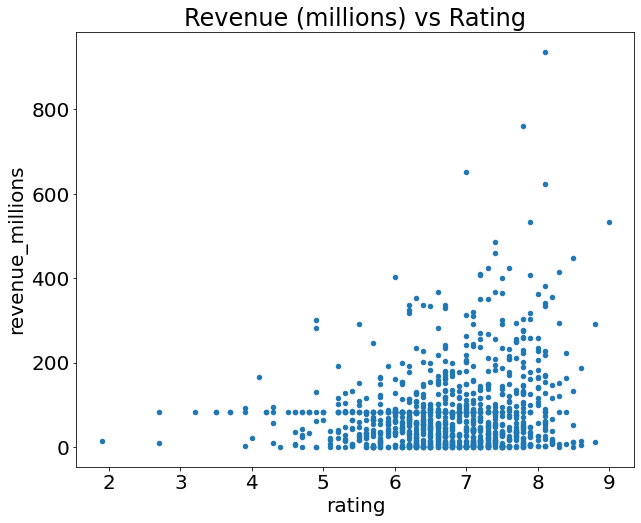

In [65]:
movies_df.plot(kind='scatter', x='rating', y='revenue_millions', title='Revenue (millions) vs Rating');

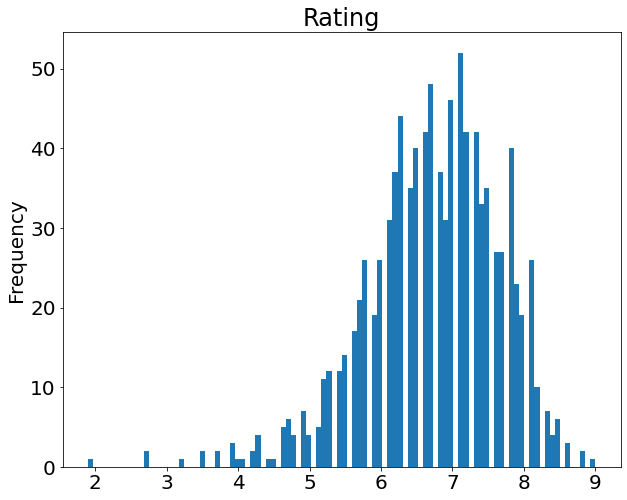

In [83]:
movies_df['rating'].plot(kind='hist', title='Rating', bins=100);

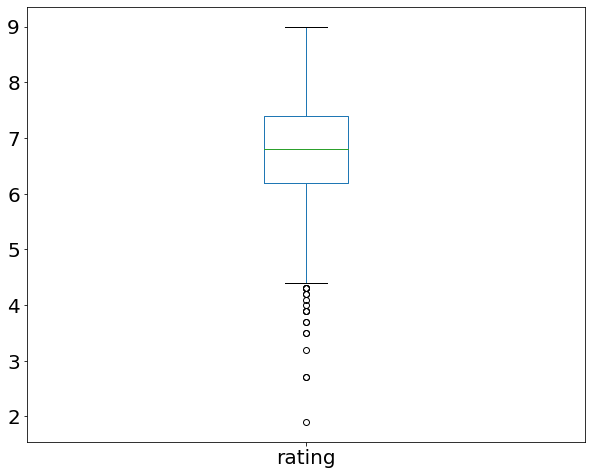

In [82]:
movies_df['rating'].plot(kind="box");

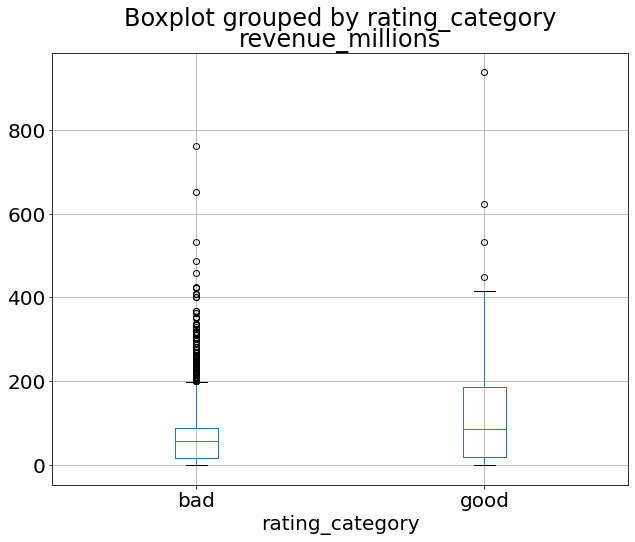

In [84]:
movies_df.boxplot(column='revenue_millions', by='rating_category');

### Basic plotting: plot

In [85]:
ts = pd.Series(np.random.randn(1000),
                index=pd.date_range('1/1/2000', periods=1000))
 

ts = ts.cumsum()

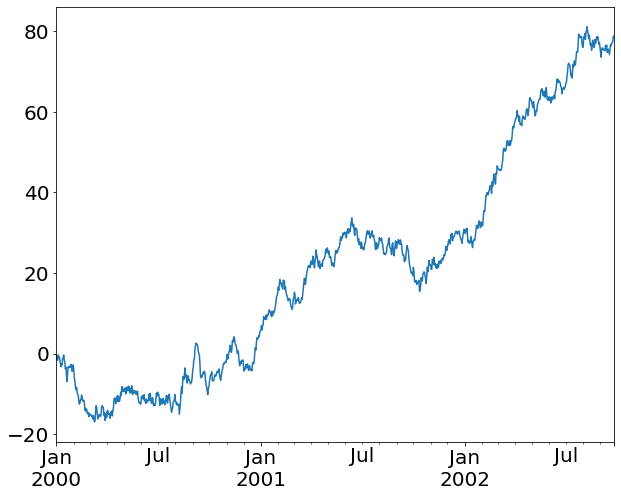

In [86]:
ts.plot();

In [87]:
df = pd.DataFrame(np.random.randn(1000, 4),
                   index=ts.index, columns=list('ABCD'))
 
df.head()

,A,B,C,D
2000-01-01,1.749175,-1.210347,0.350086,-1.569772
2000-01-02,0.143503,0.831368,-0.821859,-0.077746
2000-01-03,1.014243,0.179306,0.497909,-2.586811
2000-01-04,0.123648,-0.851655,1.831097,2.088005
2000-01-05,0.773960,2.651828,-0.659155,-1.837907


In [88]:
df = df.cumsum()
df.head()

,A,B,C,D
2000-01-01,1.749175,-1.210347,0.350086,-1.569772
2000-01-02,1.892678,-0.378979,-0.471773,-1.647518
2000-01-03,2.906921,-0.199673,0.026137,-4.234329
2000-01-04,3.030569,-1.051328,1.857234,-2.146324
2000-01-05,3.804529,1.600500,1.198079,-3.984231


<Figure size 720x576 with 0 Axes>

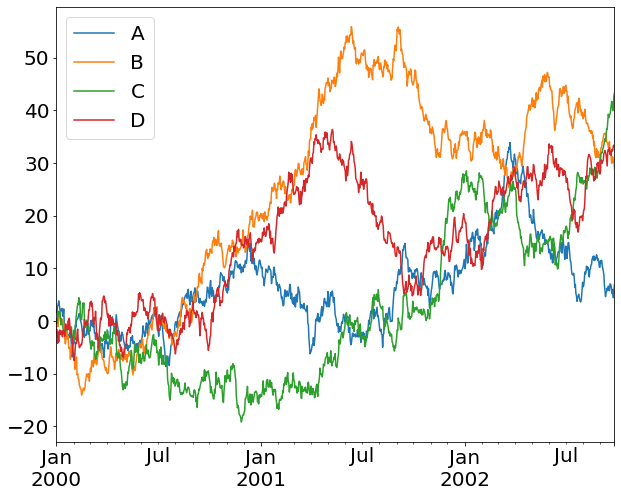

In [89]:
plt.figure();
df.plot();

In [90]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()

df3['A'] = pd.Series(list(range(len(df))))

df3.head()

,B,C,A
0,0.072486,-1.747902,0
1,0.390419,-1.349529,1
2,-1.588281,-2.762896,2
3,-0.225845,-2.127749,3
4,-0.192962,-2.716915,4


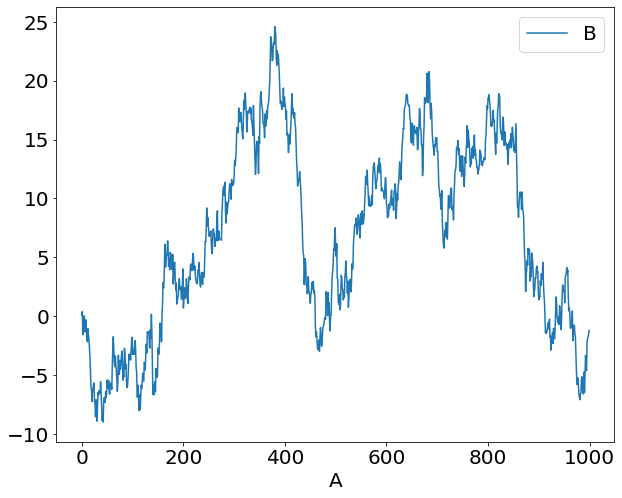

In [91]:
df3.plot(x='A', y='B');

### Other plots

Plotting methods allow for a handful of plot styles other than the default line plot. These methods can be provided as the kind keyword argument to plot(), and include:

- ‘bar’ or ‘barh’ for bar plots

- ‘hist’ for histogram

- ‘box’ for boxplot

- ‘kde’ or ‘density’ for density plots

- ‘area’ for area plots

- ‘scatter’ for scatter plots

- ‘hexbin’ for hexagonal bin plots

- ‘pie’ for pie plots

For example, a bar plot can be created the following way:

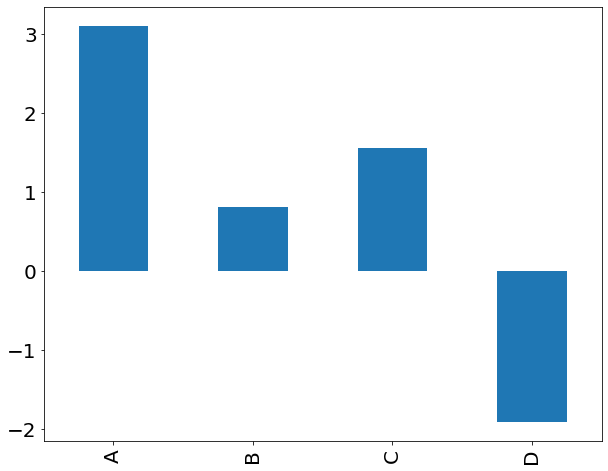

In [92]:
plt.figure();

df.iloc[5].plot(kind='bar');


In [103]:
df = pd.DataFrame()

df.plot.<tab>

SyntaxError: invalid syntax (<ipython-input-103-50a88b551e16>, line 3)

Add horizontal line

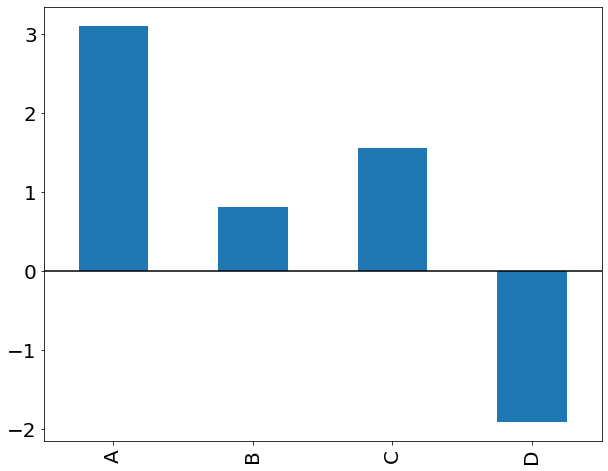

In [98]:
plt.figure();

df.iloc[5].plot(kind='bar');
plt.axhline(0, color='k');

Calling a DataFrame’s plot.bar() method produces a multiple bar plot:

In [99]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.head()

,a,b,c,d
0,0.791920,0.813430,0.998465,0.369732
1,0.864080,0.162540,0.930020,0.021030
2,0.677503,0.943104,0.316160,0.889291
3,0.705616,0.559108,0.613560,0.894964
4,0.809268,0.905783,0.951971,0.868141


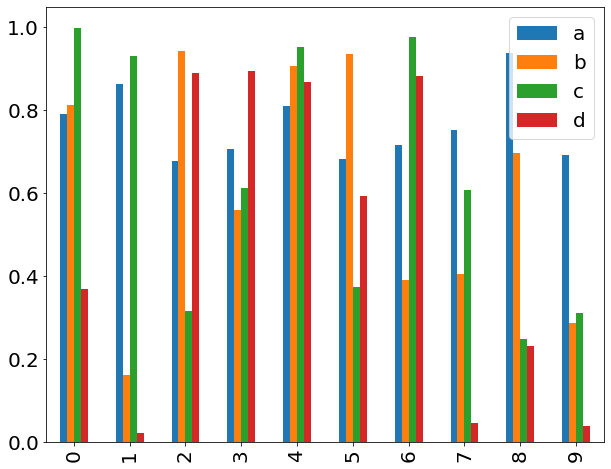

In [100]:
df2.plot.bar();

To produce a stacked bar plot, pass stacked=True:

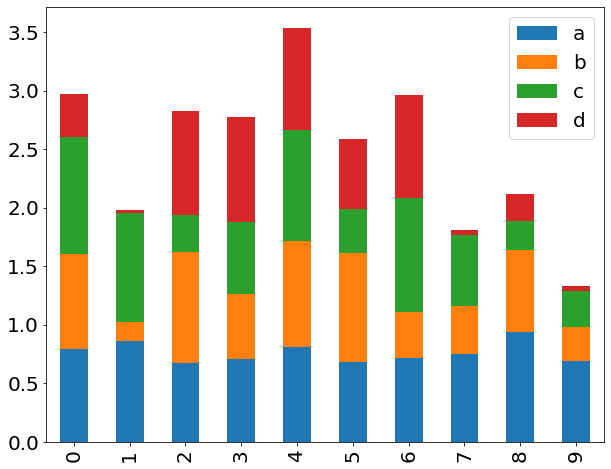

In [101]:
df2.plot.bar(stacked=True);

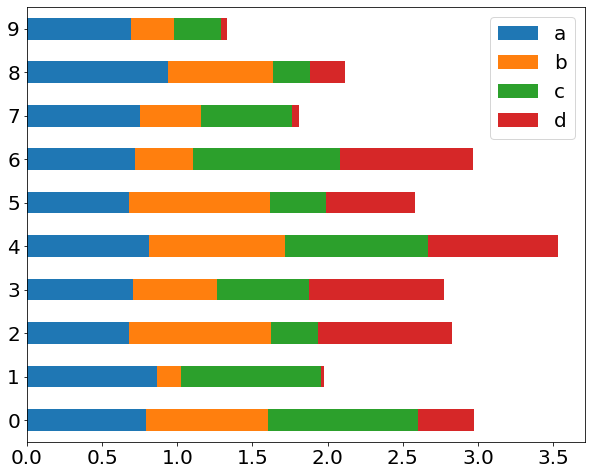

In [102]:
df2.plot.barh(stacked=True);

### Histograms

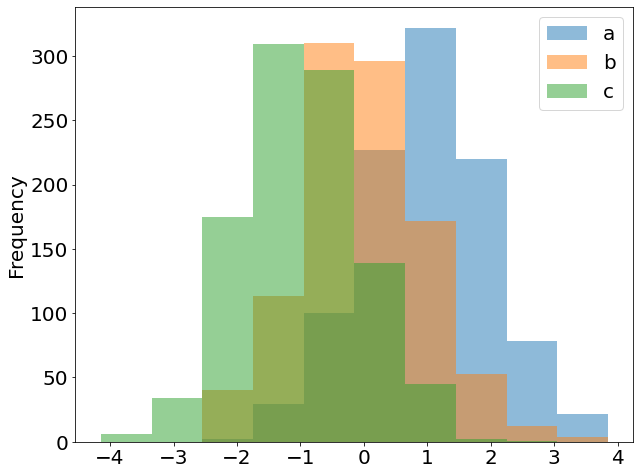

In [103]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                     'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
 
df4.plot.hist(alpha=0.5);

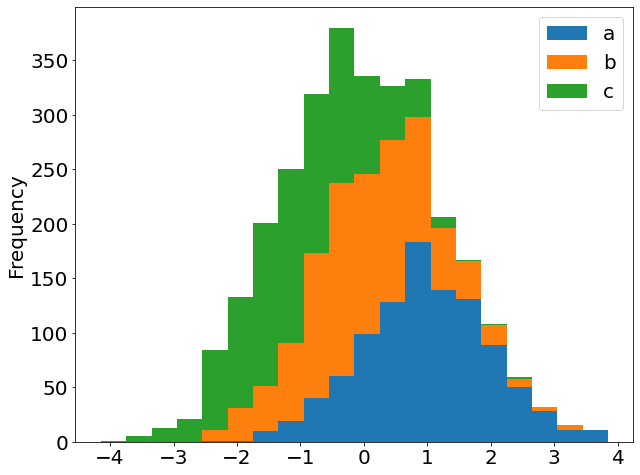

In [104]:
df4.plot.hist(stacked=True, bins=20);

<AxesSubplot:xlabel='Frequency'>

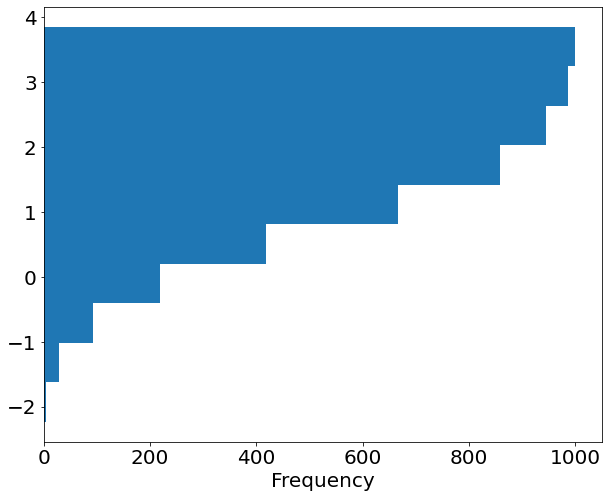

In [105]:
df4['a'].plot.hist(orientation='horizontal', cumulative=True)

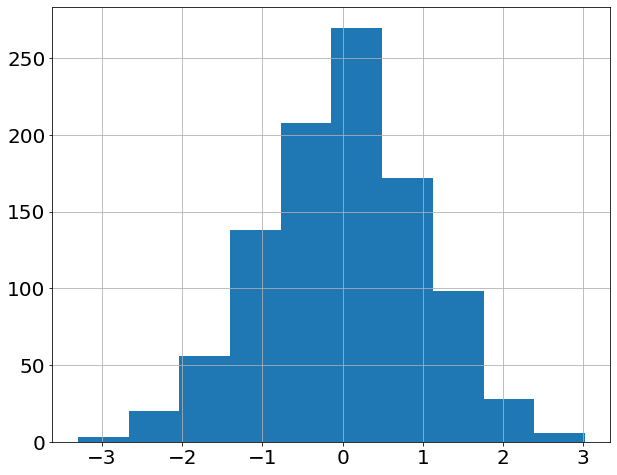

In [106]:
df['A'].diff().hist();

__DataFrame.hist()__ plots the histograms of the columns on multiple subplots:

In [111]:
pd.DataFrame.diff?

Signature: pd.DataFrame.diff(self, periods: int = 1, axis: Union[str, int] = 0) -> 'DataFrame'
Docstring:
First discrete difference of element.

Calculates the difference of a Dataframe element compared with another
element in the Dataframe (default is element in previous row).

Parameters
----------
periods : int, default 1
    Periods to shift for calculating difference, accepts negative
    values.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Take difference over rows (0) or columns (1).

Returns
-------
Dataframe
    First differences of the Series.

See Also
--------
Dataframe.pct_change: Percent change over given number of periods.
Dataframe.shift: Shift index by desired number of periods with an
    optional time freq.
Series.diff: First discrete difference of object.

Notes
-----
For boolean dtypes, this uses :meth:`operator.xor` rather than
:meth:`operator.sub`.
The result is calculated according to current dtype in Dataframe,
however dtype of the result is always floa

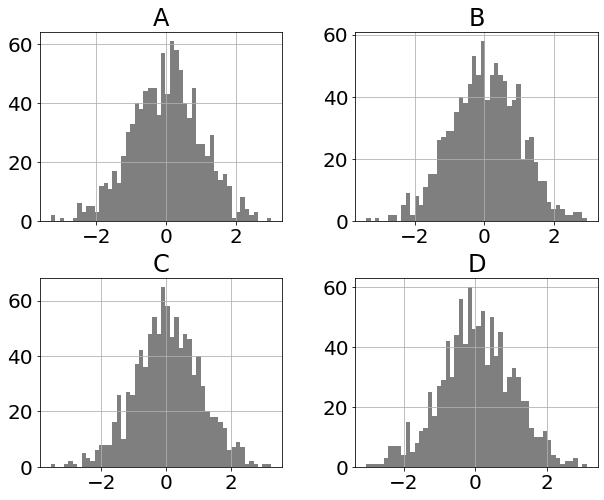

In [107]:
df.diff().hist(color='k', alpha=0.5, bins=50);

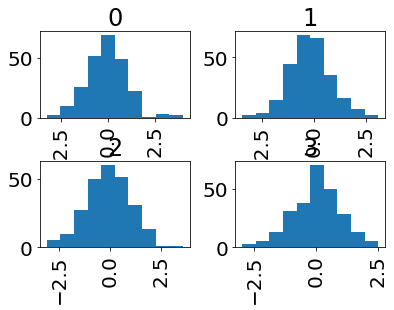

In [112]:
data = pd.Series(np.random.randn(1000))

data.hist(by=np.random.randint(0, 4, 1000), figsize=(6, 4));

### Box plots
Boxplot can be drawn calling Series.plot.box() and DataFrame.plot.box(), or DataFrame.boxplot() to visualize the distribution of values within each column.

In [120]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])

df.head()

,A,B,C,D,E
0,0.105090,0.259274,0.709970,0.025022,0.221549
1,0.972430,0.649634,0.240278,0.355834,0.424873
2,0.303317,0.632360,0.860847,0.240842,0.412008
3,0.147667,0.992309,0.266469,0.097155,0.716755
4,0.148875,0.877838,0.790387,0.855751,0.101287


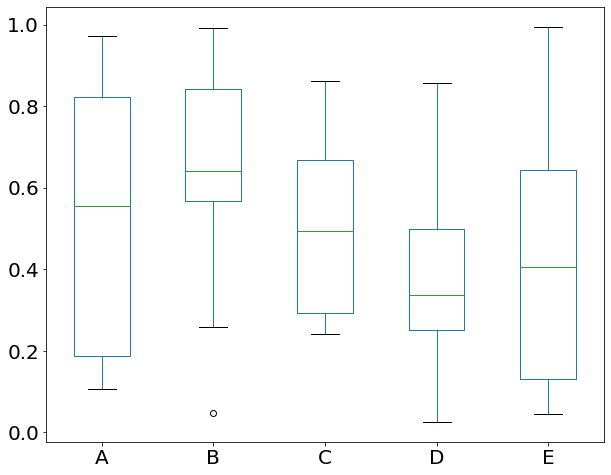

In [121]:
df.plot.box();

<AxesSubplot:>

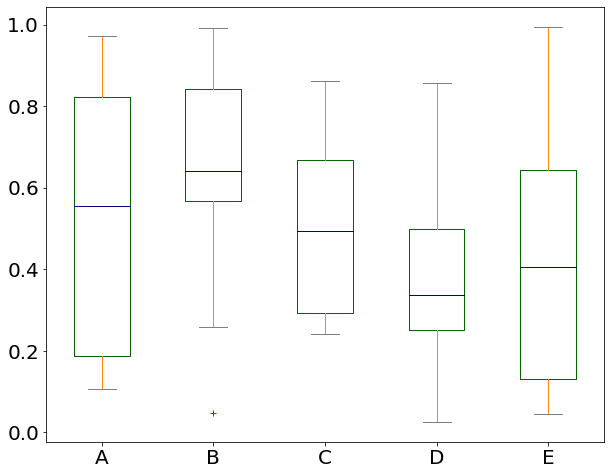

In [122]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange',
          'medians': 'DarkBlue', 'caps': 'Gray'}
 

df.plot.box(color=color, sym='r+')

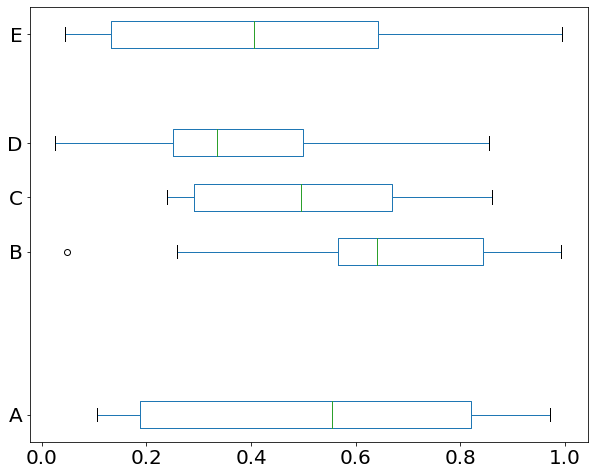

In [126]:
df.plot.box(vert=False, positions=[1, 4, 5, 6, 8]); # Add space as units

You can create a stratified boxplot using the by keyword argument to create groupings. For instance,



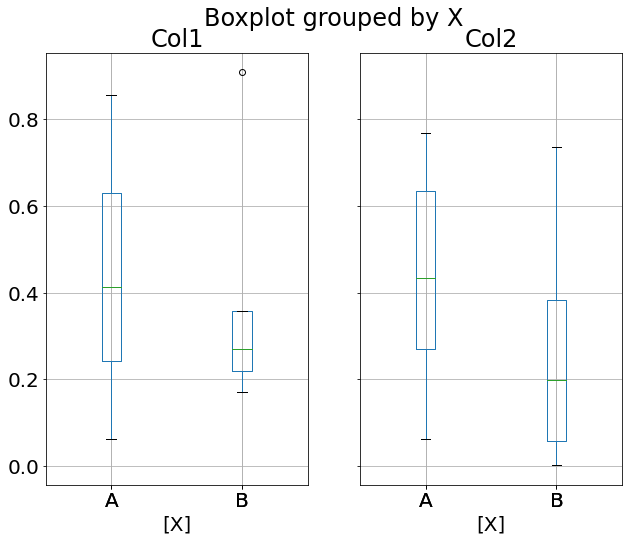

In [127]:
df = pd.DataFrame(np.random.rand(10, 2), columns=['Col1', 'Col2'])

df['X'] = pd.Series(['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'])

bp = df.boxplot(by='X');

### Area plot
You can create area plots with Series.plot.area() and DataFrame.plot.area(). Area plots are stacked by default. To produce stacked area plot, each column must be either all positive or all negative values.

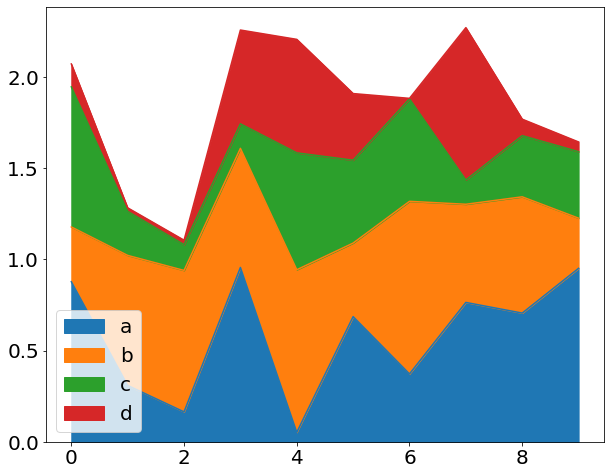

In [128]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

df.plot.area();

To produce an unstacked plot, pass stacked=False. Alpha value is set to 0.5 unless otherwise specified:



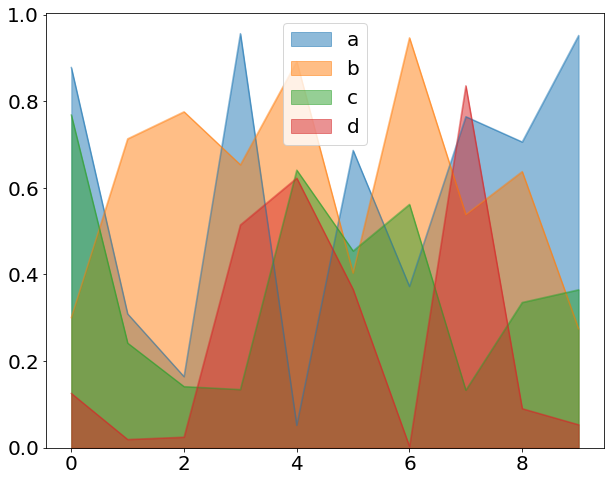

In [129]:
df.plot.area(stacked=False);

### Scatter plot
Scatter plot can be drawn by using the DataFrame.plot.scatter() method. Scatter plot requires numeric columns for the x and y axes. These can be specified by the x and y keywords.



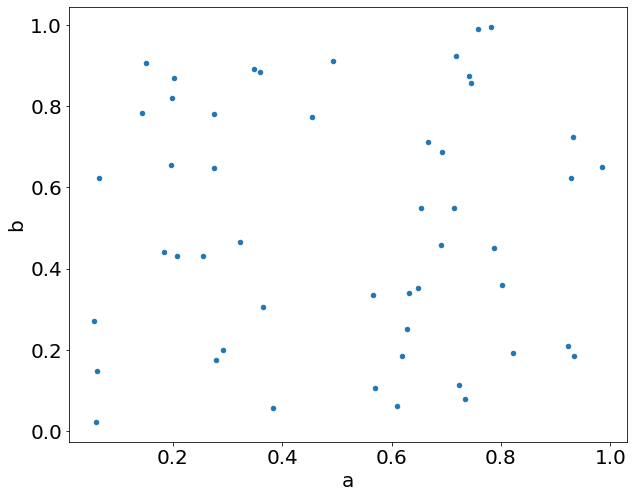

In [130]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='b');

To plot multiple column groups in a single axes, repeat plot method specifying target ax. It is recommended to specify color and label keywords to distinguish each groups.

In [131]:
df.head()

,a,b,c,d
0,0.184218,0.440435,0.453605,0.005019
1,0.927122,0.622259,0.810476,0.334032
2,0.566219,0.334530,0.618798,0.874664
3,0.787903,0.449798,0.370339,0.884274
4,0.627987,0.251738,0.522081,0.709728


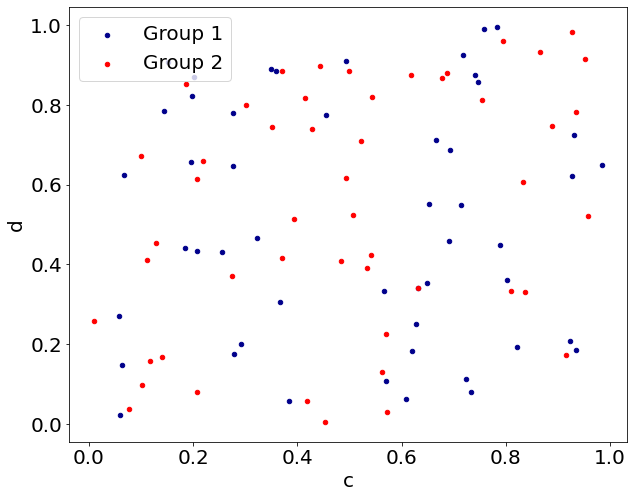

In [133]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1');

df.plot.scatter(x='c', y='d', color='Red', label='Group 2', ax=ax);

The keyword c may be given as the name of a column to provide colors for each point:

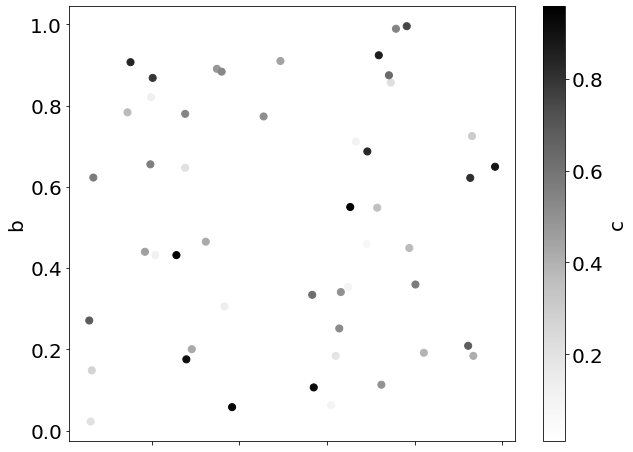

In [134]:
df.plot.scatter(x='a', y='b', c='c', s=50);

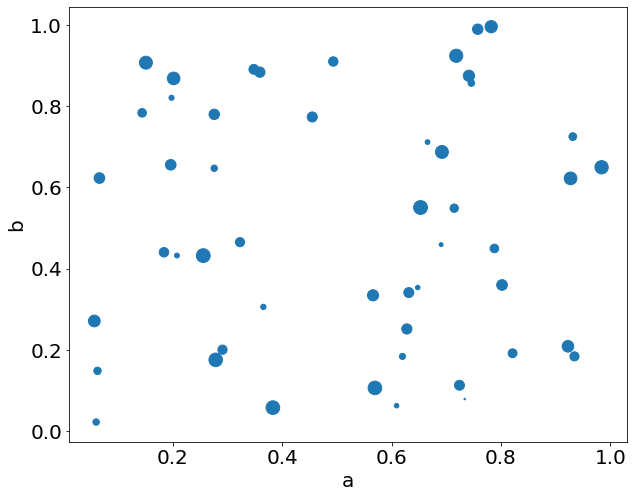

In [135]:
df.plot.scatter(x='a', y='b', s=df['c'] * 200);

### Hexagonal bin plot
You can create hexagonal bin plots with DataFrame.plot.hexbin(). Hexbin plots can be a useful alternative to scatter plots if your data are too dense to plot each point individually.

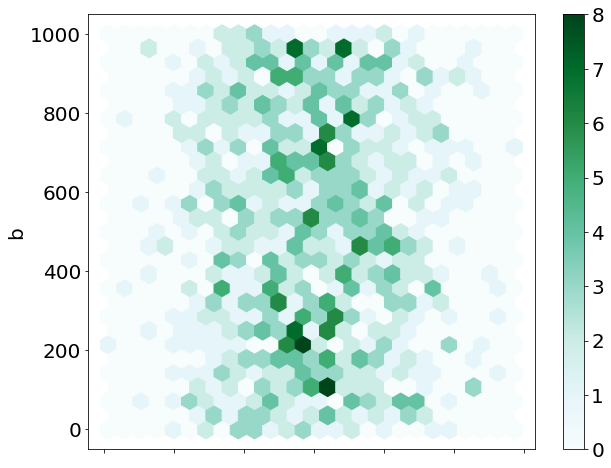

In [136]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])

df['b'] = df['b'] + np.arange(1000)

df.plot.hexbin(x='a', y='b', gridsize=25);

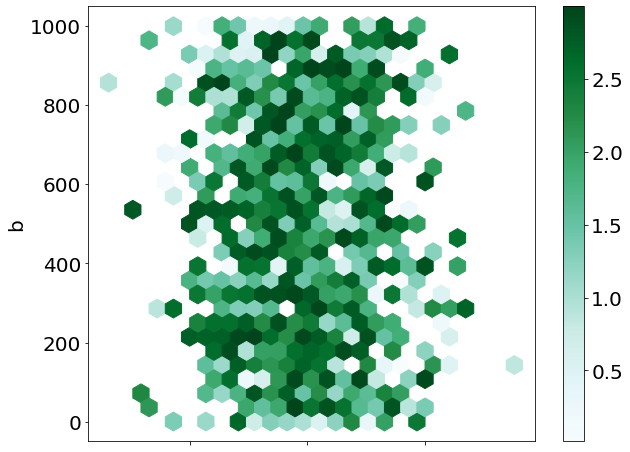

In [140]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])

df['b'] = df['b'] + np.arange(1000)

df['z'] = np.random.uniform(0, 3, 1000)

df.plot.hexbin(x='a', y='b', C='z', reduce_C_function=np.max, gridsize=25); #Function of one argument that reduces all the values in a bin to a single number (e.g. np.mean, np.max, np.sum, np.std).

### Pie plot
You can create a pie plot with DataFrame.plot.pie() or Series.plot.pie(). If your data includes any NaN, they will be automatically filled with 0. A ValueError will be raised if there are any negative values in your data.



<AxesSubplot:ylabel='series'>

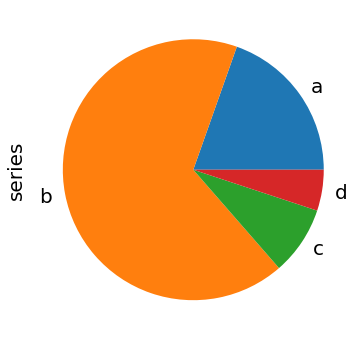

In [141]:
series = pd.Series(3 * np.random.rand(4),
                    index=['a', 'b', 'c', 'd'], name='series')

series.plot.pie(figsize=(6, 6))

### Scatter matrix plot
You can create a scatter plot matrix using the scatter_matrix method in pandas.plotting:

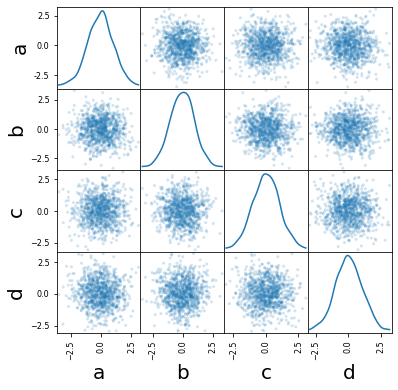

In [142]:
from pandas.plotting import scatter_matrix

df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])

scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde');

### Density plot¶
You can create density plots using the Series.plot.kde() and DataFrame.plot.kde() methods.

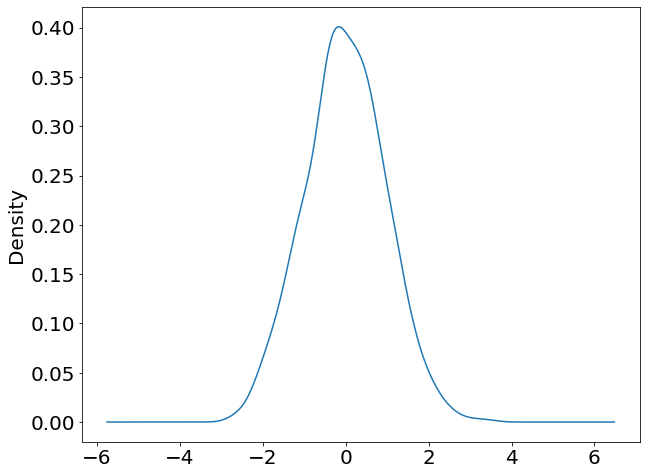

In [143]:
ser = pd.Series(np.random.randn(1000))
ser.plot.kde();


### Andrews curves
Andrews curves allow one to plot multivariate data as a large number of curves that are created using the attributes of samples as coefficients for Fourier series. By coloring these curves differently for each class it is possible to visualize data clustering. Curves belonging to samples of the same class will usually be closer together and form larger structures.

Note: The “Iris” dataset is available [here](https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv).

<AxesSubplot:>

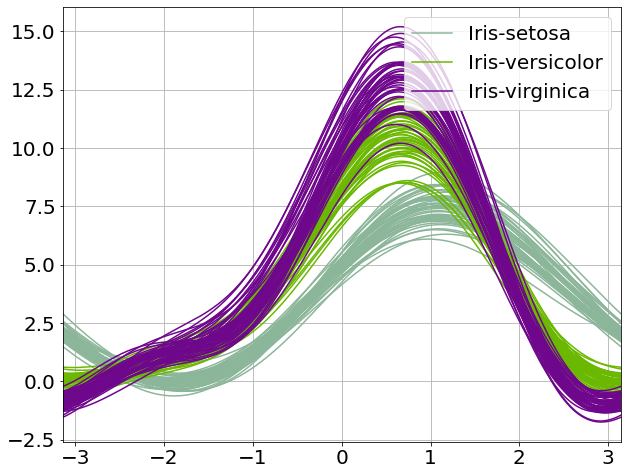

In [141]:
from pandas.plotting import andrews_curves
data = pd.read_csv('iris.csv')
andrews_curves(data, 'Name')

### Parallel coordinates
Parallel coordinates is a plotting technique for plotting multivariate data. Parallel coordinates allows one to see clusters in data and to estimate other statistics visually. Using parallel coordinates points are represented as connected line segments. Each vertical line represents one attribute. One set of connected line segments represents one data point. Points that tend to cluster will appear closer together.

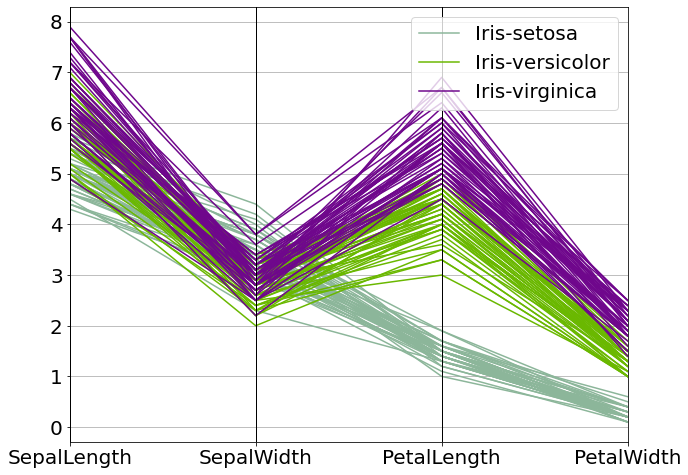

In [143]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(data, 'Name');

### Lag plot
Lag plots are used to check if a data set or time series is random. Random data should not exhibit any structure in the lag plot. Non-random structure implies that the underlying data are not random. The lag argument may be passed, and when lag=1 the plot is essentially data[:-1] vs. data[1:].

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

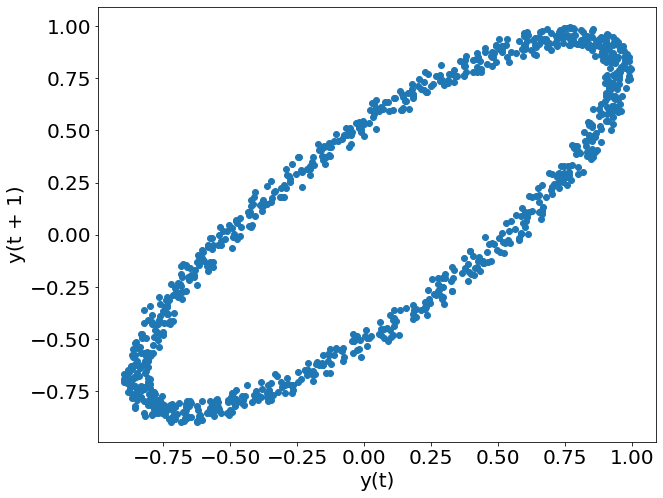

In [145]:
from pandas.plotting import lag_plot

spacing = np.linspace(-99 * np.pi, 99 * np.pi, num=1000)
data = pd.Series(0.1 * np.random.rand(1000) + 0.9 * np.sin(spacing))

lag_plot(data)

### Autocorrelation plot
Autocorrelation plots are often used for checking randomness in time series. This is done by computing autocorrelations for data values at varying time lags. If time series is random, such autocorrelations should be near zero for any and all time-lag separations. If time series is non-random then one or more of the autocorrelations will be significantly non-zero. The horizontal lines displayed in the plot correspond to 95% and 99% confidence bands. The dashed line is 99% confidence band.

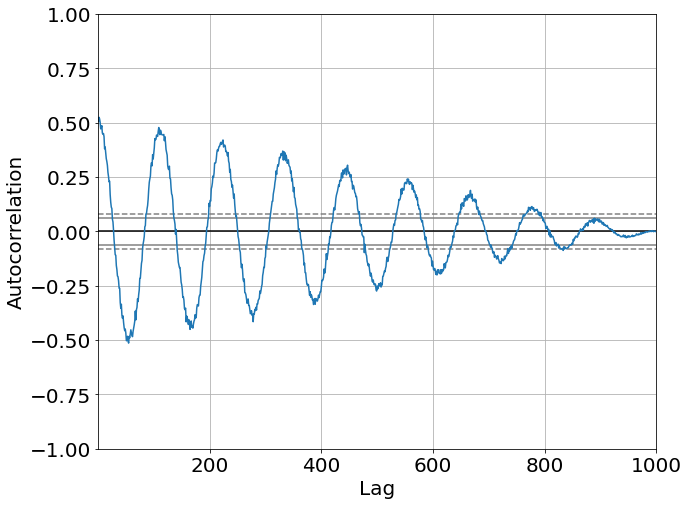

In [144]:
from pandas.plotting import autocorrelation_plot

spacing = np.linspace(-9 * np.pi, 9 * np.pi, num=1000)
data = pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(spacing))
autocorrelation_plot(data);

In [145]:
data

0      0.594554
1      0.530715
2      0.063672
3      0.293652
4      0.578136
         ...   
995    0.083392
996    0.548710
997    0.449131
998    0.286945
999    0.108827
Length: 1000, dtype: float64

### Bootstrap plot
Bootstrap plots are used to visually assess the uncertainty of a statistic, such as mean, median, midrange, etc. A random subset of a specified size is selected from a data set, the statistic in question is computed for this subset and the process is repeated a specified number of times. Resulting plots and histograms are what constitutes the bootstrap plot.

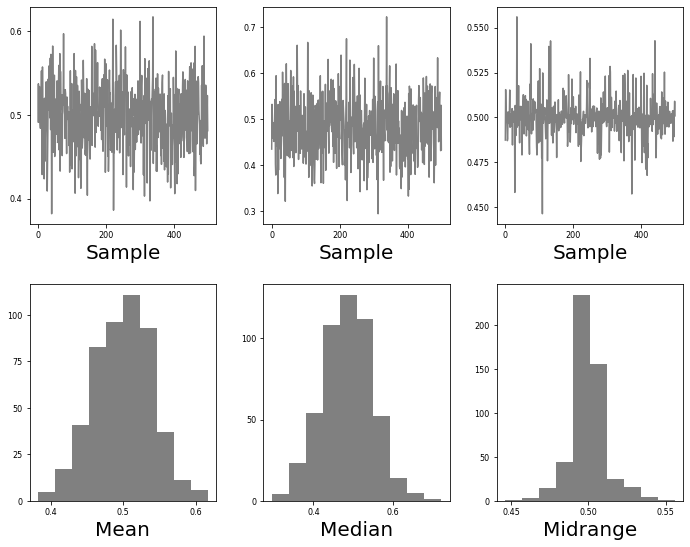

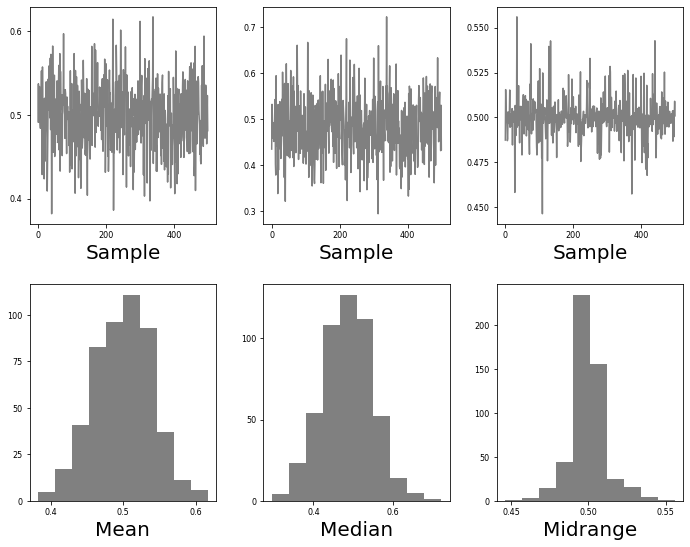

In [148]:
from pandas.plotting import bootstrap_plot
data = pd.Series(np.random.rand(1000))
bootstrap_plot(data, size=50, samples=500, color='grey')

### General plot style arguments
Most plotting methods have a set of keyword arguments that control the layout and formatting of the returned plot:



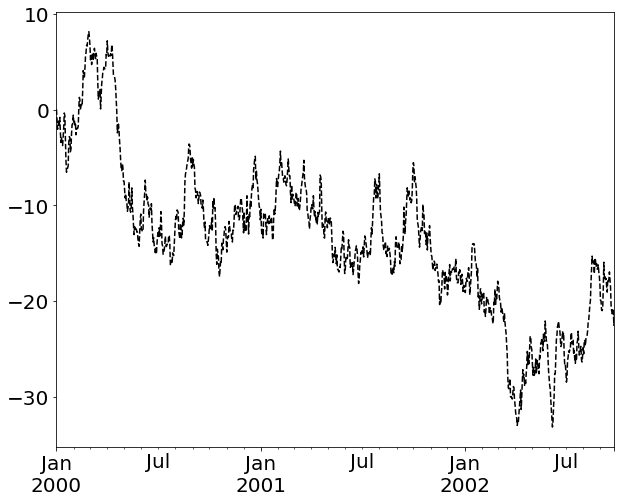

In [149]:
ts.plot(style='k--', label='Series');

### Controlling the legend
You may set the legend argument to False to hide the legend, which is shown by default.



<AxesSubplot:>

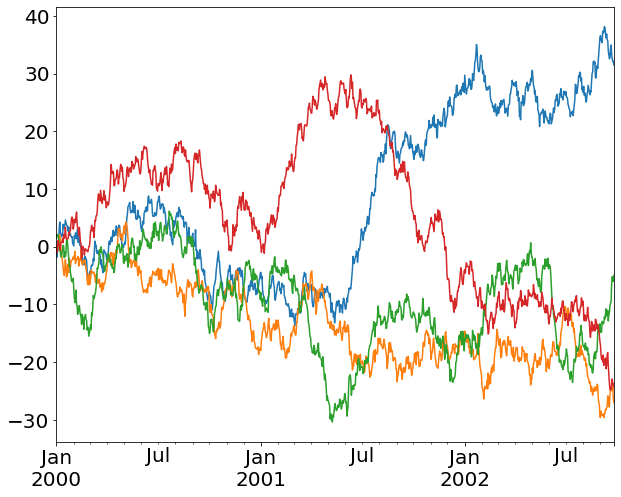

In [150]:
df = pd.DataFrame(np.random.randn(1000, 4),
                   index=ts.index, columns=list('ABCD'))
 

df = df.cumsum()

df.plot(legend=False)

### Controlling the labels¶

You may set the xlabel and ylabel arguments to give the plot custom labels for x and y axis. By default, pandas will pick up index name as xlabel, while leaving it empty for ylabel.

<AxesSubplot:xlabel='new x', ylabel='new y'>

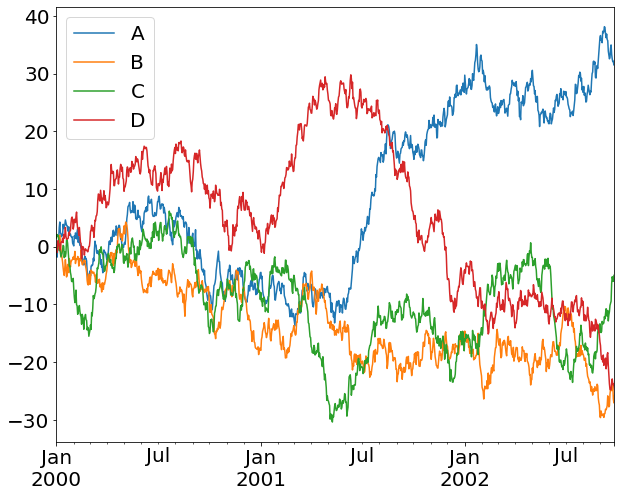

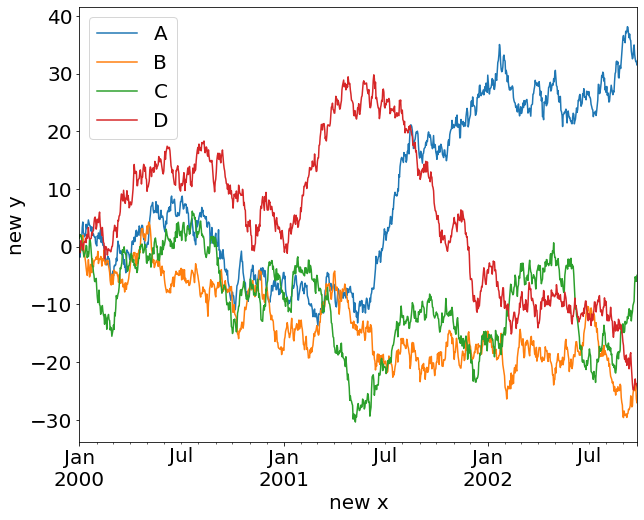

In [151]:
df.plot()
df.plot(xlabel="new x", ylabel="new y")

### Scales
You may pass logy to get a log-scale Y axis.

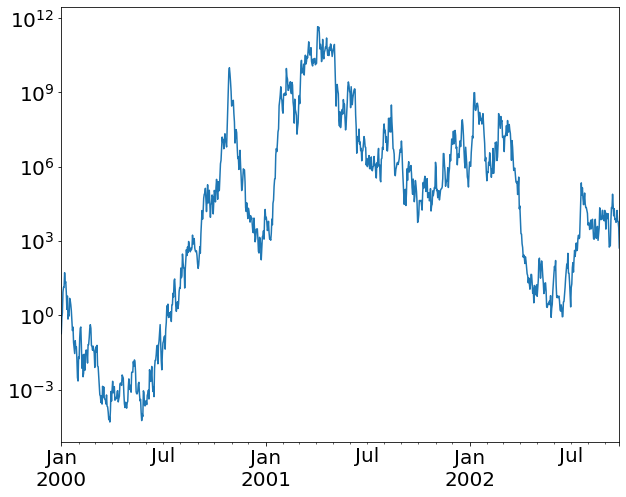

In [153]:
ts = pd.Series(np.random.randn(1000),
                index=pd.date_range('1/1/2000', periods=1000))
 

ts = np.exp(ts.cumsum())
ts.plot(logy=True);

### Plotting on a secondary y-axis (Dual axis)
To plot data on a secondary y-axis, use the secondary_y keyword: 



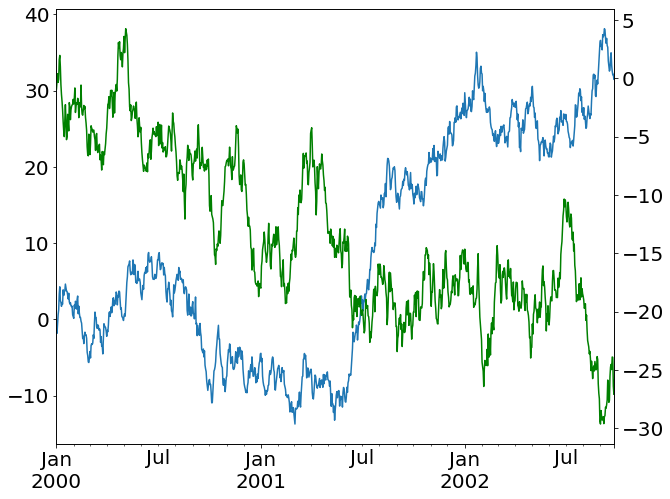

In [157]:
df['A'].plot()
df['B'].plot(secondary_y=True, style='g');


To plot some columns in a DataFrame, give the column names to the secondary_y keyword:

Text(0, 0.5, 'AB scale')

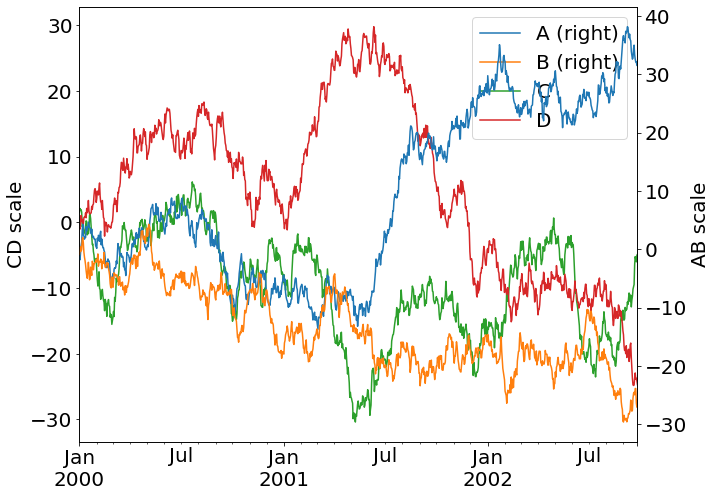

In [160]:
ax = df.plot(secondary_y=['A', 'B'])
ax.set_ylabel('CD scale')

ax.right_ax.set_ylabel('AB scale')


Note that the columns plotted on the secondary y-axis is automatically marked with “(right)” in the legend. To turn off the automatic marking, use the mark_right=False keyword:

<AxesSubplot:>

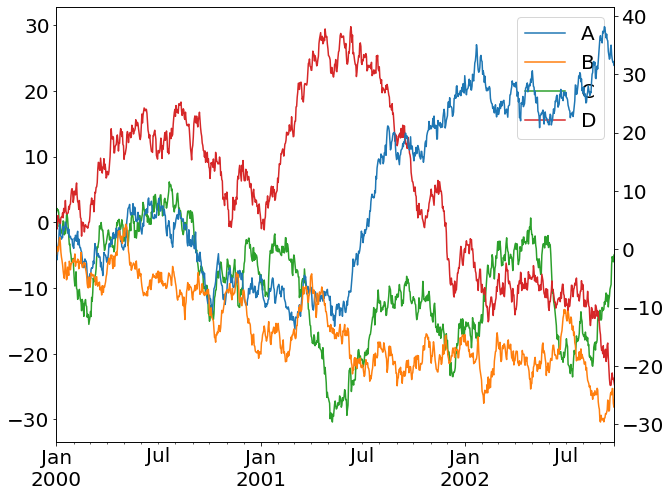

In [161]:
df.plot(secondary_y=['A', 'B'], mark_right=False)

### Subplots
Each Series in a DataFrame can be plotted on a different axis with the subplots keyword:

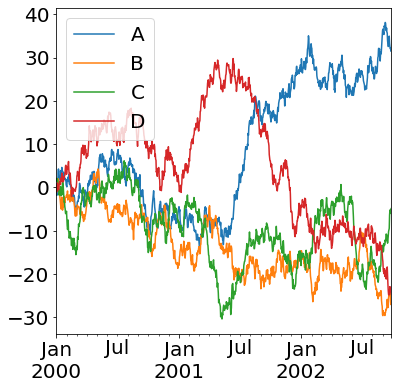

In [163]:
df.plot(subplots=False, figsize=(6, 6));

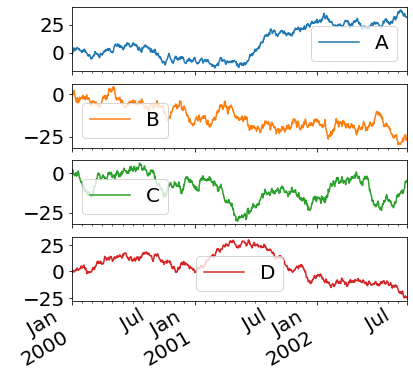

In [164]:
df.plot(subplots=True, figsize=(6, 6));

### Using layout and targeting multiple axes
The layout of subplots can be specified by the layout keyword. It can accept (rows, columns). The layout keyword can be used in hist and boxplot also. If the input is invalid, a ValueError will be raised.

The number of axes which can be contained by rows x columns specified by layout must be larger than the number of required subplots. If layout can contain more axes than required, blank axes are not drawn. Similar to a NumPy array’s reshape method, you can use -1 for one dimension to automatically calculate the number of rows or columns needed, given the other.

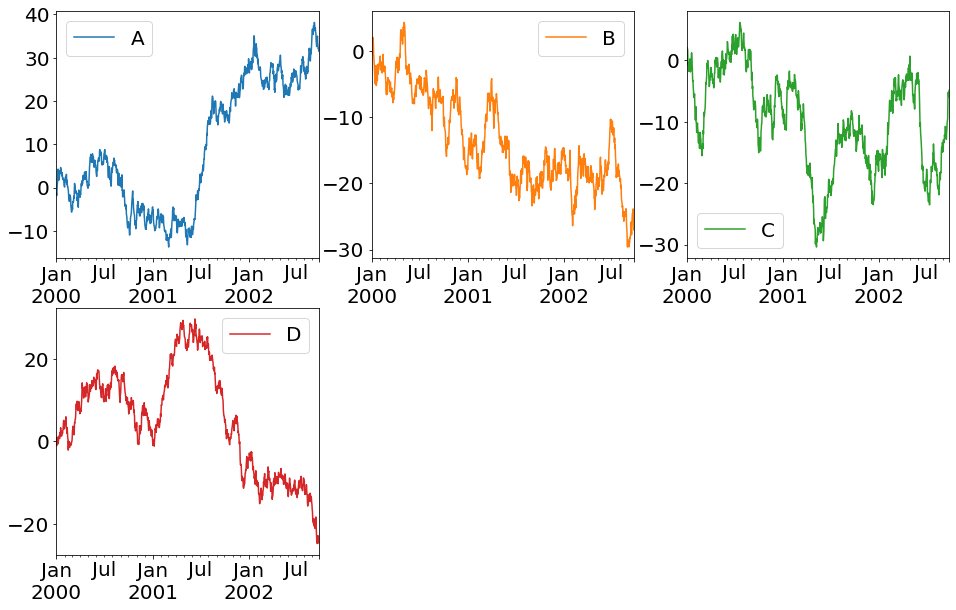

In [171]:
df.plot(subplots=True, layout=(2, 3), figsize=(16, 10), sharex=False);

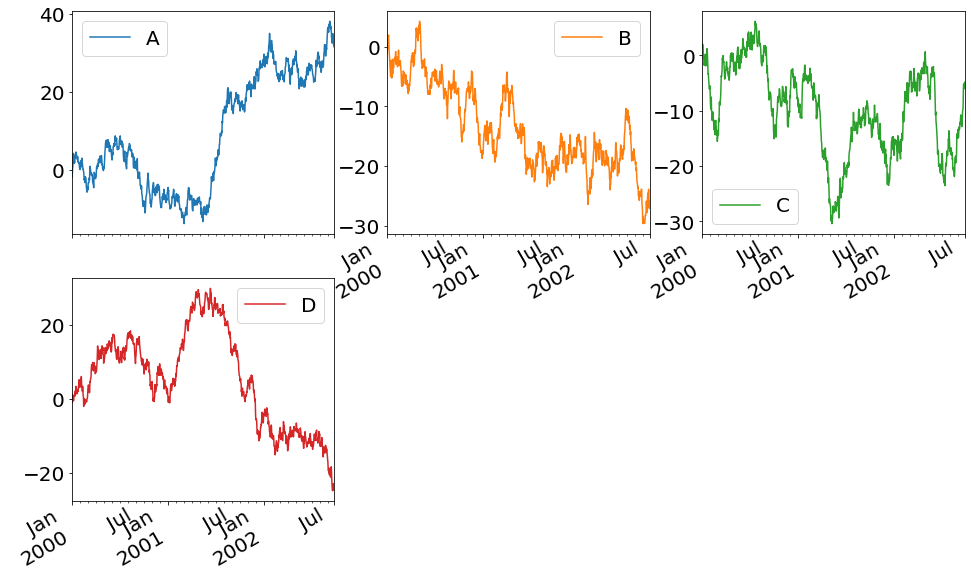

In [170]:
df.plot(subplots=True, layout=(2, 3), figsize=(16, 10), sharex=True);

### Colormaps
A potential issue when plotting a large number of columns is that it can be difficult to distinguish some series due to repetition in the default colors. To remedy this, DataFrame plotting supports the use of the colormap argument, which accepts either a Matplotlib [colormap](https://matplotlib.org/api/cm_api.html) or a string that is a name of a colormap registered with Matplotlib. A visualization of the default matplotlib colormaps is available [here](https://matplotlib.org/examples/color/colormaps_reference.html).

As matplotlib does not directly support colormaps for line-based plots, the colors are selected based on an even spacing determined by the number of columns in the DataFrame. There is no consideration made for background color, so some colormaps will produce lines that are not easily visible.

To use the cubehelix colormap, we can pass colormap='cubehelix'.



<AxesSubplot:>

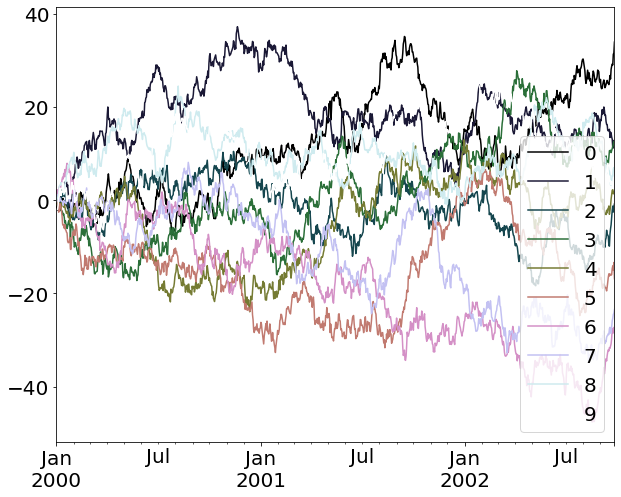

In [172]:
df = pd.DataFrame(np.random.randn(1000, 10), index=ts.index)

df = df.cumsum()

df.plot(colormap='cubehelix')

Alternatively, we can pass the colormap itself:

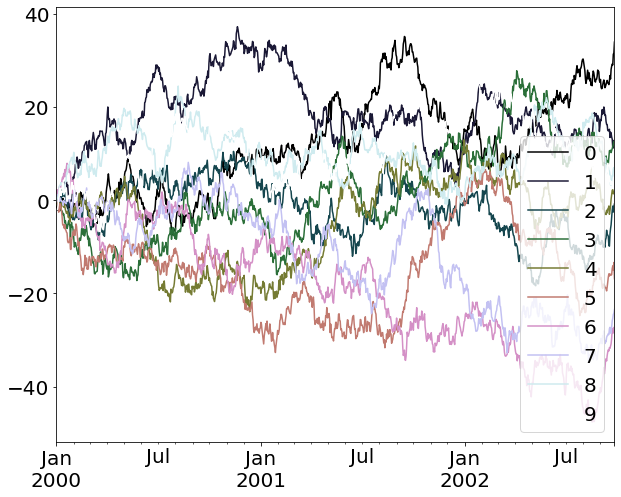

In [175]:
from matplotlib import cm
df.plot(colormap=cm.cubehelix);

Colormaps can also be used other plot types, like bar charts:

<AxesSubplot:>

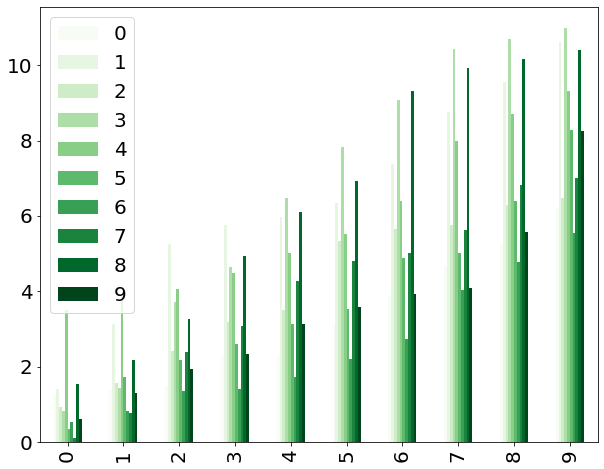

In [177]:
dd = pd.DataFrame(np.random.randn(10, 10)).applymap(abs)
dd = dd.cumsum()

dd.plot.bar(colormap='Greens')

<AxesSubplot:>

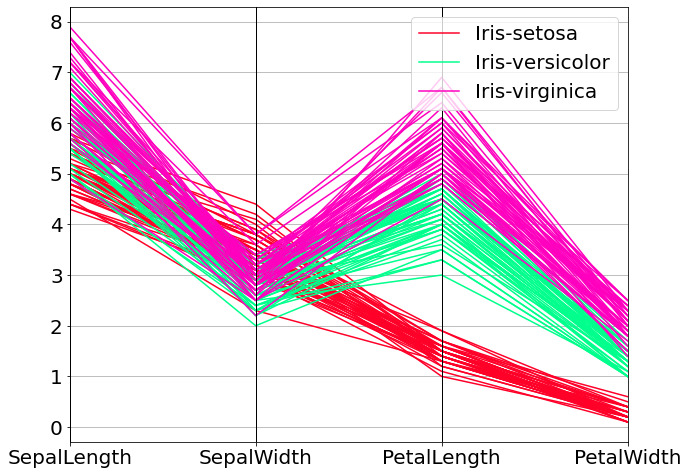

In [179]:
data = pd.read_csv('iris.csv')

parallel_coordinates(data, 'Name', colormap='gist_rainbow')

<AxesSubplot:>

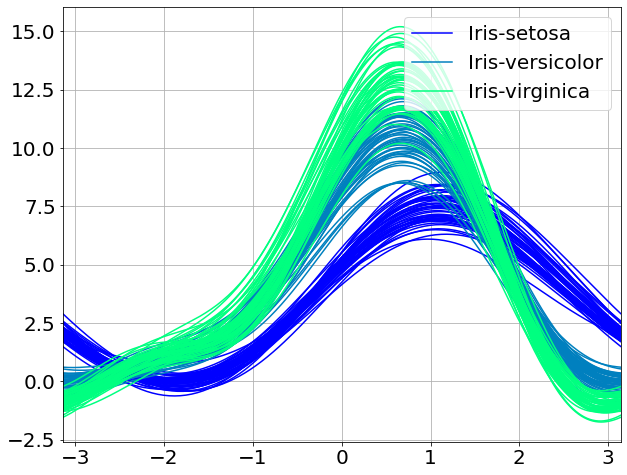

In [180]:
andrews_curves(data, 'Name', colormap='winter')